In [2]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)

# Wilson

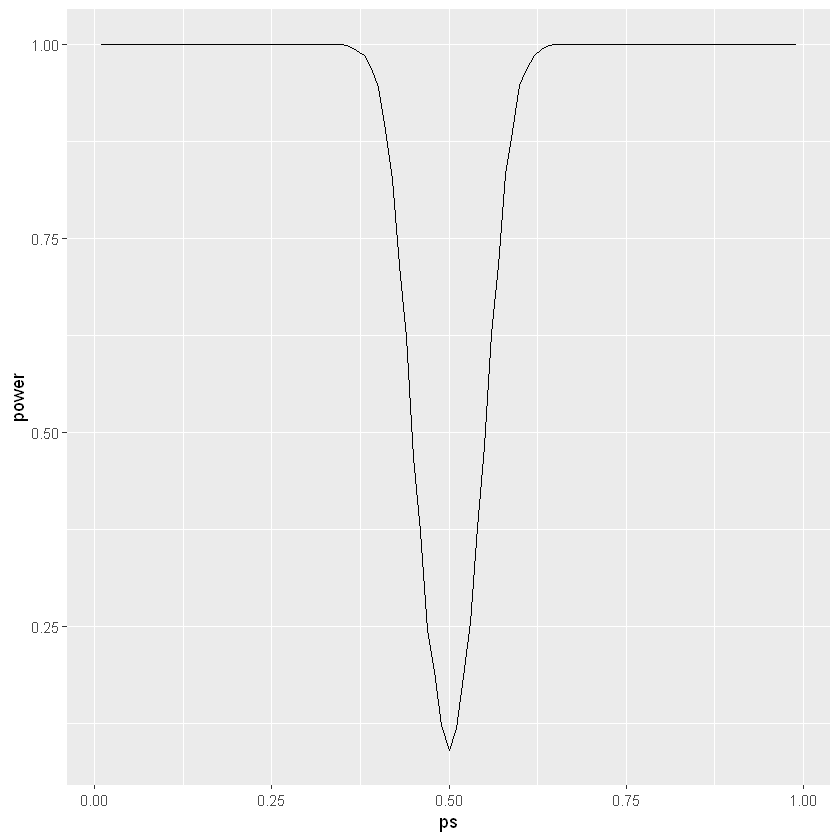

In [3]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p0, size=n)
    z <- qnorm(1 - alpha)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p & p < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Clopper-Pearson

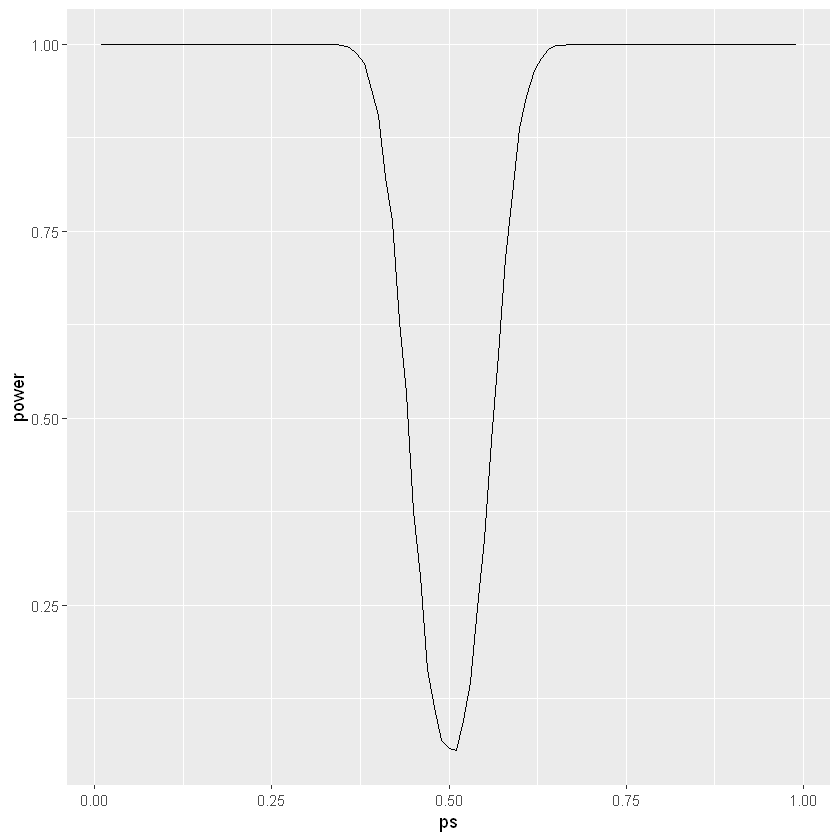

In [4]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, size=n, prob=p0)
    tests <- pbinom(S, size=n, prob=p) > alpha/2  &  1 - pbinom(S, size=n, prob=p) > alpha/2 
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Jeffreys

# Porównanie

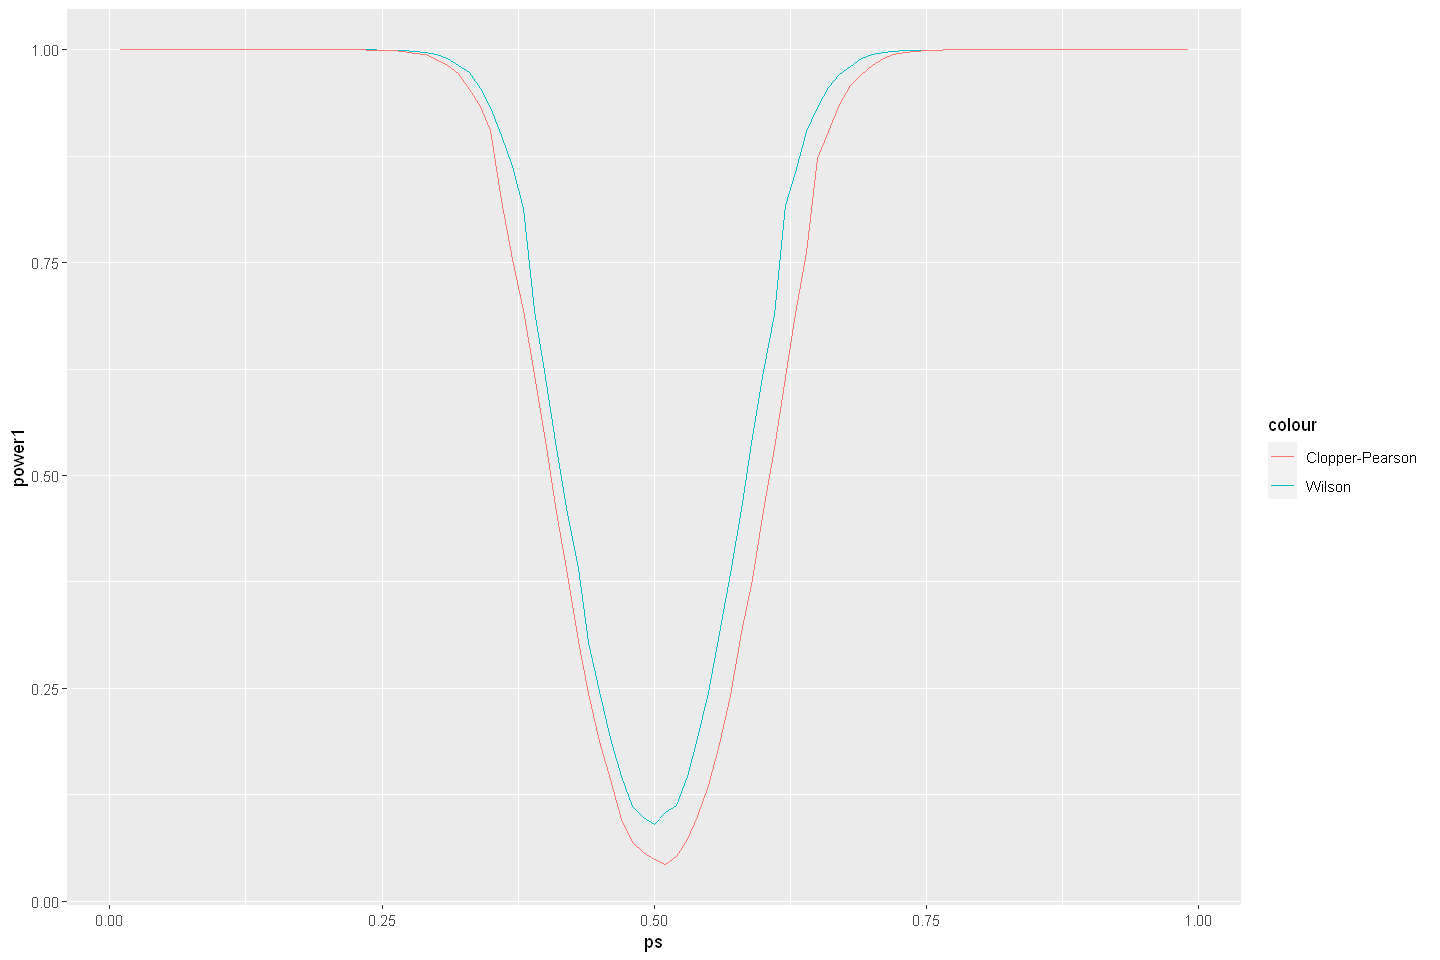

In [5]:
n <- 100
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p0, size=n)
    z <- qnorm(1 - alpha)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p & p < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p0)
    tests <- pbinom(S, size=n, prob=p) > alpha/2  &  1 - pbinom(S, size=n, prob=p) > alpha/2 
    power2 <- append(power2, 1 - sum(tests) / N)
}

options(repr.plot.width = 12, repr.plot.height = 8)
ggplot() + geom_line(aes(ps, power1, col="Wilson")) + geom_line(aes(ps, power2, col="Clopper-Pearson"))